In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error
from data.men_standing_dataset import get_filenames

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load file names

In [31]:
import glob
test_examples_path = "../data/images"
test_filenames = glob.glob(test_examples_path+"/*jpg")
test_filenames.extend(glob.glob(test_examples_path+"/*bmp"))
test_filenames.extend(glob.glob(test_examples_path+"/*png"))
print("Total images in directory - ",len(test_filenames))

Total images in directory -  8


## Load model

In [32]:
model_location = os.path.join('..', 'models', 'weights_generic.28-0.10.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

In [33]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=[angle_error])

## Evaluate model

In [34]:
batch_size = 64
out = model.evaluate_generator(
    RotNetDataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func=preprocess_input,
        crop_center=True,
        crop_largest_rect=True,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

NO HERE
Test loss: 1.5984230041503906
Test angle error: 1.5


## Display examples

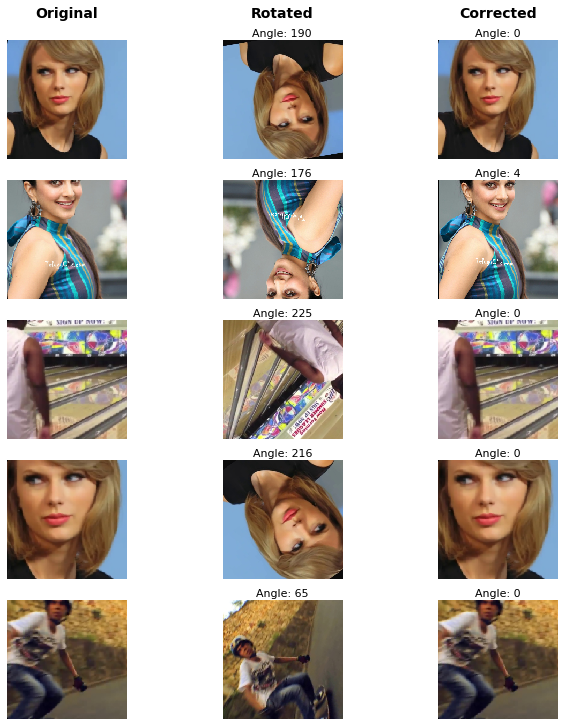

In [68]:
import random
test_filenames = glob.glob(test_examples_path+"/*jpg")
num_images = len(test_filenames)
display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)